In [1]:
import dataget as dg
from matplotlib import pyplot as plt
from python_path import PythonPath
import dicto as do
from dask.diagnostics import ProgressBar

with PythonPath(".."):
    from pilotnet.data_augmentation import augment_dataset

RAW_DIR = "../data/raw"


/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cristian/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


In [2]:
df = dg.data(
    "udacity-selfdriving-simulator",
    path = RAW_DIR,
).df

len(df)

74691

In [3]:
params = do.load("../pilotnet/config/data-augmentation.yml")
params.augmentation_factor = 2
sd = augment_dataset(df.sample(n=20), params)
sd

Dask DataFrame Structure:
              steering throttle    brake    speed camera filename  folder filepath augment augment_idx   image
npartitions=8                                                                                                 
81             float64  float64  float64  float64  int64   object  object   object    bool       int64  object
842                ...      ...      ...      ...    ...      ...     ...      ...     ...         ...     ...
...                ...      ...      ...      ...    ...      ...     ...      ...     ...         ...     ...
7536               ...      ...      ...      ...    ...      ...     ...      ...     ...         ...     ...
7683               ...      ...      ...      ...    ...      ...     ...      ...     ...         ...     ...
Dask Name: assign, 24 tasks

In [4]:
with ProgressBar():
    sample = sd.compute()
    sample["image"] = sample.image.apply(lambda t: t[0])

[########################################] | 100% Completed |  0.2s


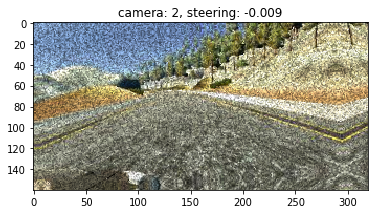

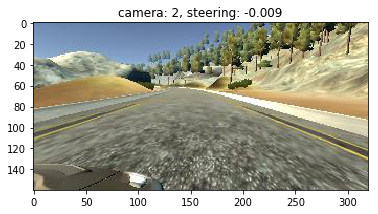

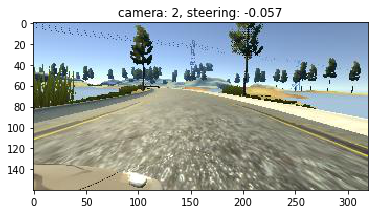

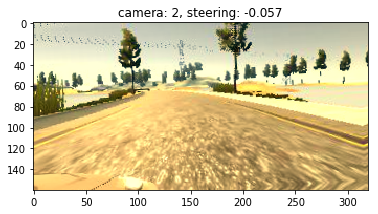

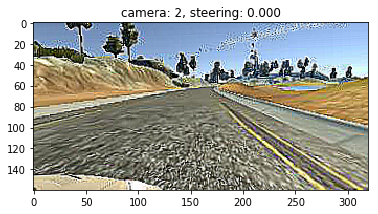

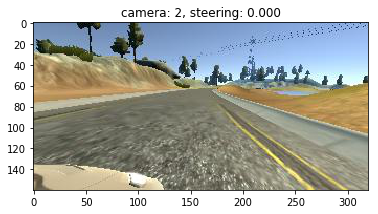

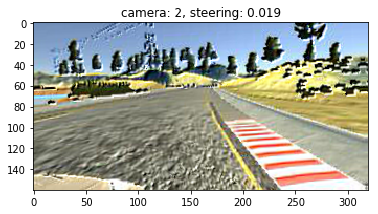

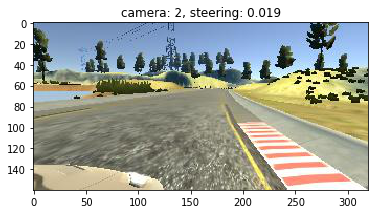

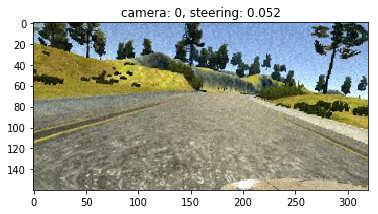

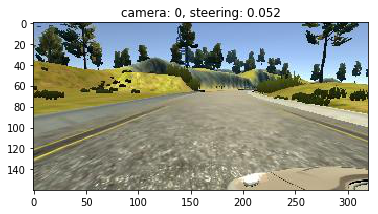

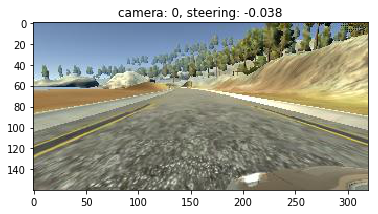

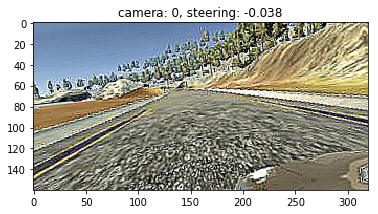

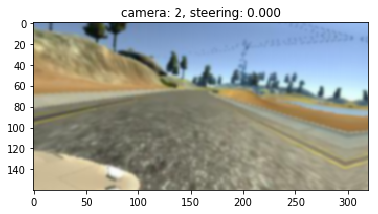

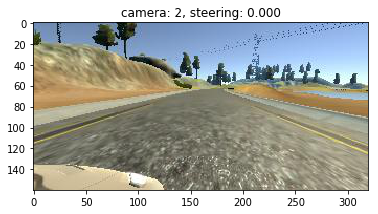

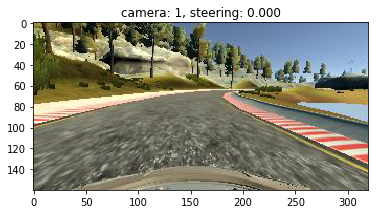

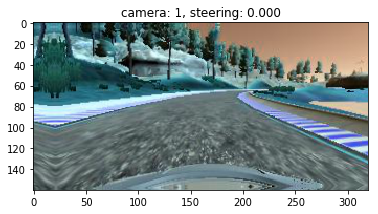

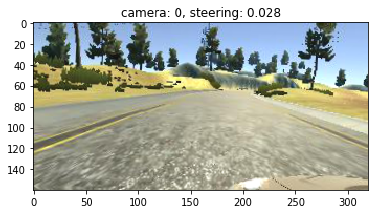

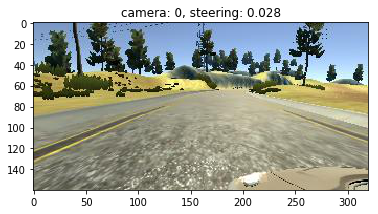

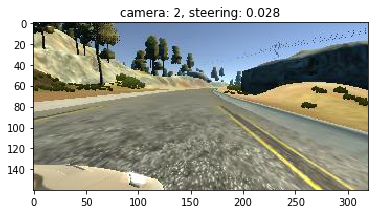

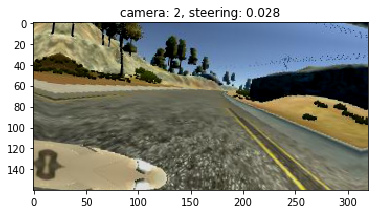

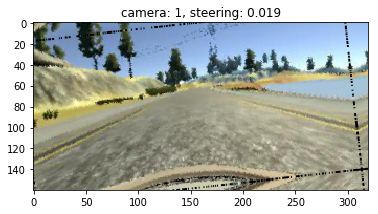

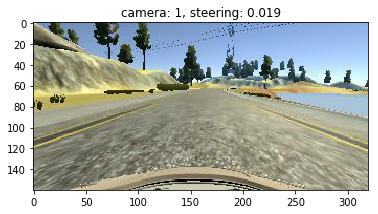

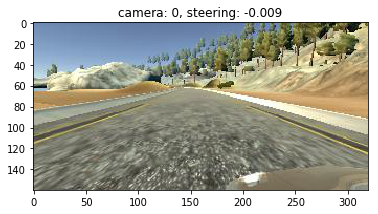

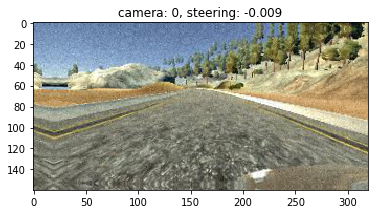

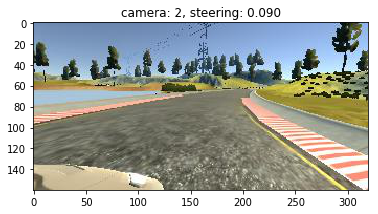

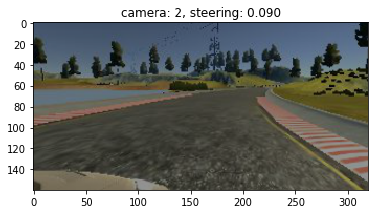

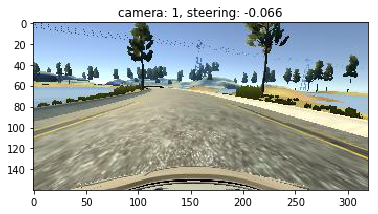

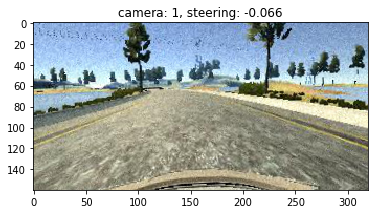

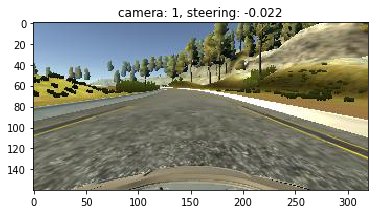

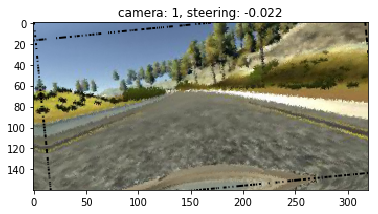

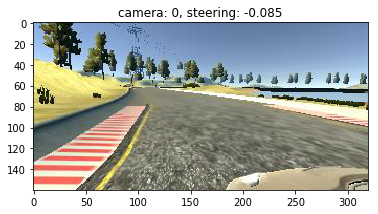

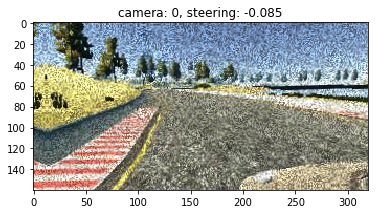

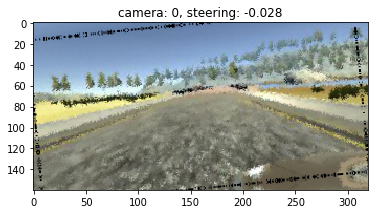

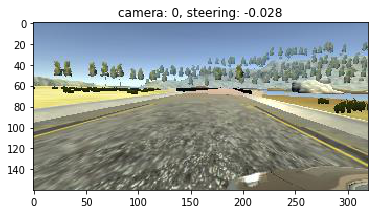

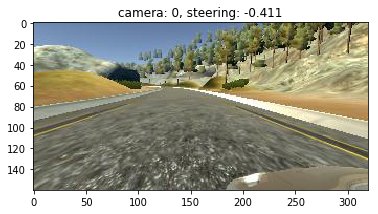

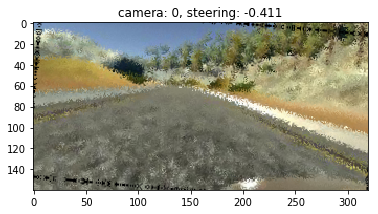

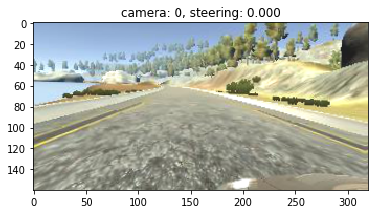

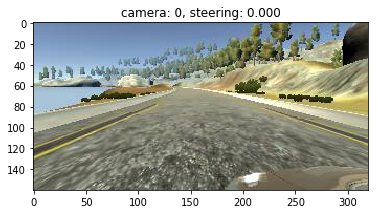

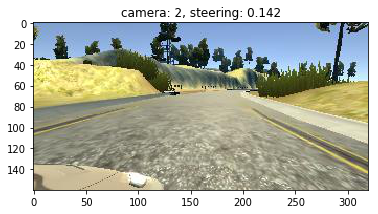

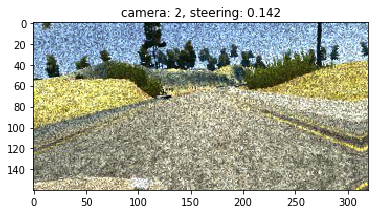

In [5]:
for i, row in sd.iterrows():
    
    image = row["image"][0]
    camera = row["camera"]
    steering = row["steering"]
    
    plt.imshow(image)
    
    plt.title("camera: {camera}, steering: {steering:.3f}".format(
        camera = camera,
        steering = steering,
    ))
    plt.show()